# real driver classifier analysis

## import dependancies

In [83]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns

## import data

In [77]:
media = pl.read_parquet("../data/media.parquet")
results = pl.read_parquet("../data/binomial_classifier_results.parquet")

display(media.head())
display(results.head())

hash,media_type,media_title,season,episode,release_year,pipeline_status,error_status,error_condition,rejection_status,rejection_reason,parent_path,target_path,original_title,original_path,original_link,rss_source,uploader,genre,language,rt_score,metascore,imdb_rating,imdb_votes,imdb_id,resolution,video_codec,upload_type,audio_codec,created_at,updated_at
str,cat,str,i64,i64,i64,cat,bool,str,cat,str,str,str,str,str,str,cat,str,list[str],list[str],i64,i64,f64,i64,str,str,str,str,str,datetime[μs],datetime[μs]
"""db46260e97f0b91bf45a53939d84fd…","""movie""","""Band of Robbers""",null,null,2015,"""rejected""",false,null,"""rejected""","""resolution 720p is not in allo…",null,null,"""Band of Robbers (2015) [720p] …",null,"""https://yts.mx/torrent/downloa…","""yts.mx""","""YTS.MX""","[""Adventure"", ""Comedy"", ""Crime""]","[""English""]",81,57,60.0,4560,"""tt4048668""","""720p""",null,null,null,2025-01-13 12:47:03.896517,2025-01-16 17:28:57.023399
"""f31dedb7e2d36ee7d471123bec1496…","""movie""","""Rose Rosy Te Gulab""",null,null,2024,"""rejected""",false,null,"""rejected""","""language ['Punjabi'] does not …",null,null,"""Rose Rosy Te Gulab (2024) [108…",null,"""https://yts.mx/torrent/downloa…","""yts.mx""","""YTS.MX""","[""Romance""]","[""Punjabi""]",null,null,60.0,192,"""tt31473803""","""1080p""",null,null,null,2024-12-20 04:47:03.462714,2025-01-16 17:28:57.023399
"""8e3c34b0b4e24930c54c05d5dba21c…","""movie""","""Life After Fighting""",null,null,2024,"""rejected""",false,null,"""rejected""","""rt_score is null""",null,null,"""Life After Fighting (2024) [10…",null,"""https://yts.mx/torrent/downloa…","""yts.mx""","""YTS.MX""","[""Action"", ""Drama"", ""Thriller""]","[""English""]",null,null,64.0,1288,"""tt21478426""","""1080p""",null,null,null,2024-12-19 23:04:47.771747,2025-01-16 17:28:57.023399
"""a97bfa6735d9cb0ec8789db16c8a57…","""movie""","""White Lion""",null,null,2010,"""rejected""",false,null,"""rejected""","""resolution 720p is not in allo…",null,null,"""White Lion (2010) [720p] [BluR…",null,"""https://yts.mx/torrent/downloa…","""yts.mx""","""YTS.MX""","[""Drama"", ""Family""]","[""English""]",null,null,65.0,1046,"""tt1618421""","""720p""",null,null,null,2025-01-10 19:47:03.845458,2025-01-16 17:28:57.023399
"""c398a58c83af110fd5d9d76c9a9c74…","""movie""","""How to Make Millions Before Gr…",null,null,2024,"""rejected""",false,null,"""rejected""","""language ['Thai'] does not inc…",null,null,"""How to Make Millions Before Gr…",null,"""https://yts.mx/torrent/downloa…","""yts.mx""","""YTS.MX""","[""Comedy"", ""Drama""]","[""Thai""]",100,null,80.0,7285,"""tt31392609""","""720p""",null,null,null,2024-12-21 14:47:02.779903,2025-01-16 17:28:57.023399


actual,predicted,probability,hash
bool,i64,f32,str
false,0,0.000943,"""cbc242ea47de86cf891006c7ed25fc…"
false,0,0.008866,"""ca5c795afe0f4c8ff46e92763bbc98…"
true,1,0.952527,"""101dd52467d1679e91f23874334603…"
false,0,0.008866,"""6c9650f11c4510cc41af82fd62b864…"
false,0,0.007421,"""54b5bdba8c435f8faccb7db9ccb29b…"


## format data for analysis

In [78]:
# join tables
df = results.join(media, on="hash", how="left")

# coerce predcited to boolean 
df = df.with_columns(pl.col("predicted").cast(pl.Boolean))

# create all confusion matrix fields
df = df.with_columns(
    cm_value = pl.when(pl.col("actual"))
        .then(
            pl.when(pl.col("predicted"))
                .then(pl.lit("TP"))
                .otherwise(pl.lit("FN"))
        ).otherwise(
            pl.when(pl.col("predicted"))
                .then(pl.lit("FP"))
                .otherwise(pl.lit("TN"))        
        )
)

# select only relevant fields
df = df.select(
    "media_title",
    "predicted",
    "actual",
    "cm_value",
    "probability",
    "release_year",
    "rt_score",
    "metascore",
    "imdb_rating",
    "imdb_votes",
    "original_title",
    "hash"
)

display(df.head())

# convert to pandas for compabiltiy 
pdf = df.to_pandas()

media_title,predicted,actual,cm_value,probability,release_year,rt_score,metascore,imdb_rating,imdb_votes,original_title,hash
str,bool,bool,str,f32,i64,i64,i64,f64,i64,str,str
"""Bagman""",false,false,"""TN""",0.000943,2024,null,null,47.0,3205,"""Bagman (2024) [2160p] [WEBRip]…","""cbc242ea47de86cf891006c7ed25fc…"
"""Ride the Snake""",false,false,"""TN""",0.008866,2025,null,null,null,null,"""Ride the Snake (2025) [1080p] …","""ca5c795afe0f4c8ff46e92763bbc98…"
"""The Big Dog""",true,true,"""TP""",0.952527,2023,82,null,70.0,85,"""The Big Dog (2023) [1080p] [WE…","""101dd52467d1679e91f23874334603…"
"""With You in the Future""",false,false,"""TN""",0.008866,2025,null,null,null,null,"""With You in the Future (2025) …","""6c9650f11c4510cc41af82fd62b864…"
"""Frank Capra: Mr America""",false,false,"""TN""",0.007421,2023,null,null,null,null,"""Frank Capra: Mr America (2023)…","""54b5bdba8c435f8faccb7db9ccb29b…"


## visualize results

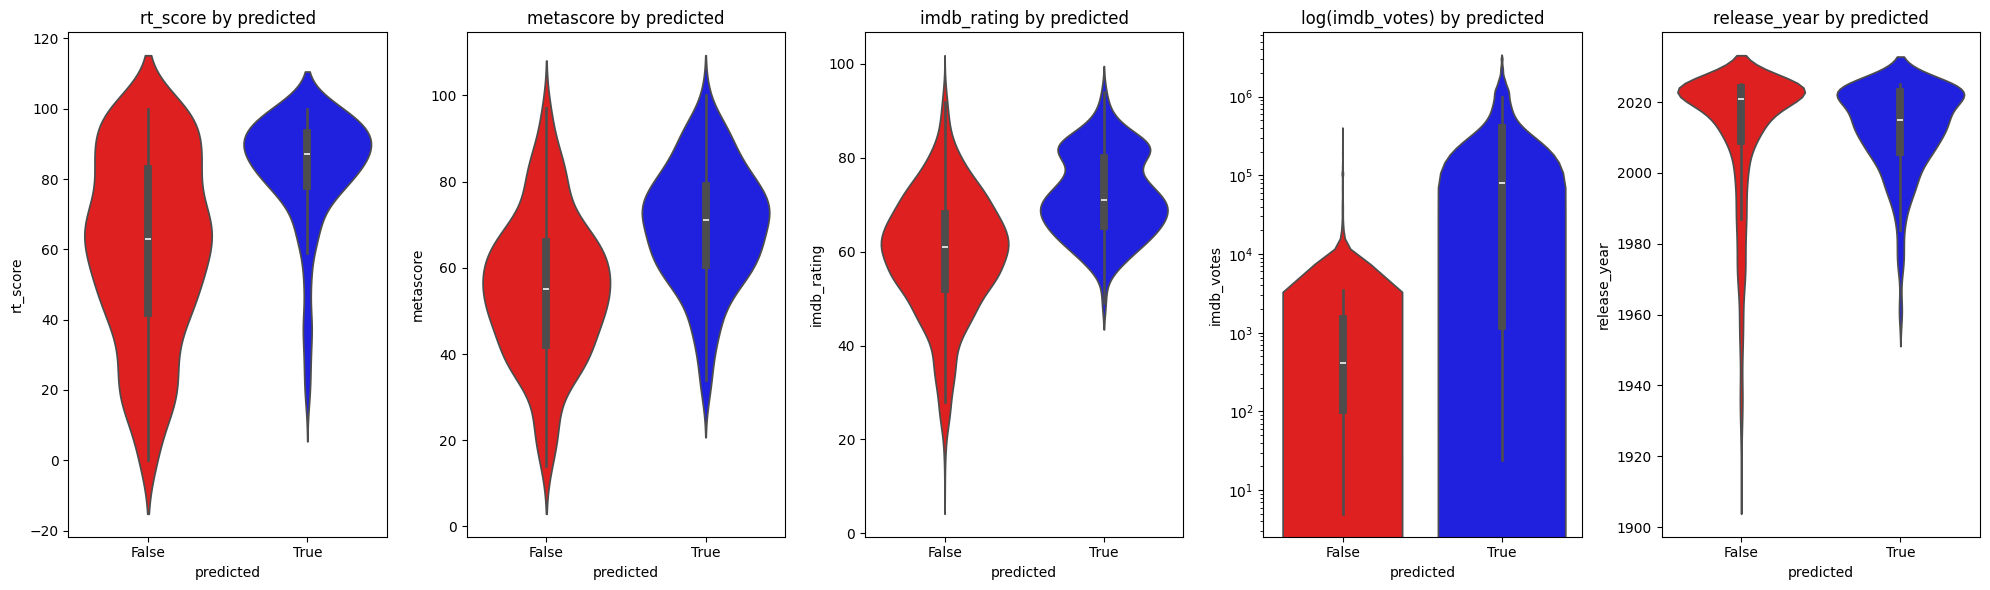

In [47]:
# distribution of numeric values by prediction label

# Create a figure with four subplots side by side
fig, axes = plt.subplots(1, 5, figsize=(20, 6))

# Define the colors for the classes
palette = {False: 'red', True: 'blue'}

# plot
sns.violinplot(x='predicted', y='rt_score', data=pdf, ax=axes[0], hue='predicted', palette=palette)
axes[0].set_title('rt_score by predicted')
axes[0].get_legend().remove()

sns.violinplot(x='predicted', y='metascore', data=pdf, ax=axes[1], hue='predicted', palette=palette)
axes[1].set_title('metascore by predicted')
axes[1].get_legend().remove()

sns.violinplot(x='predicted', y='imdb_rating', data=pdf, ax=axes[2], hue='predicted', palette=palette)
axes[2].set_title('imdb_rating by predicted')
axes[2].get_legend().remove()

sns.violinplot(x='predicted', y='imdb_votes', data=pdf, ax=axes[3], hue='predicted', palette=palette)
axes[3].set_title('log(imdb_votes) by predicted')
axes[3].get_legend().remove()

sns.violinplot(x='predicted', y='release_year', data=pdf, ax=axes[4], hue='predicted', palette=palette)
axes[4].set_title('release_year by predicted')
axes[4].get_legend().remove()

if metric == 'imdb_votes':
    axes[i].set_yscale('log')

# Adjust layout
plt.tight_layout()
plt.show()

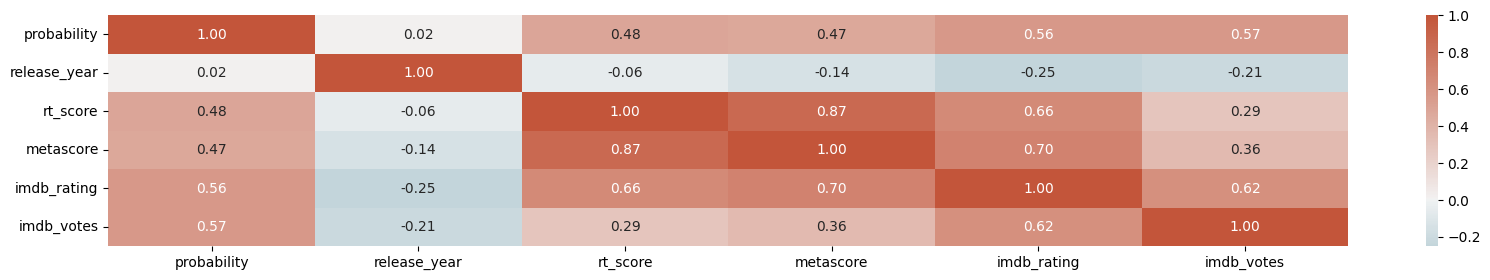

In [72]:
# correlation matrix
corr_df = df.select(
    "probability",
    "release_year",
    "rt_score",
    "metascore",
    "imdb_rating",
    "imdb_votes",
).drop_nulls()
corr_pdf = corr_df.to_pandas()

# plot correlation matrix
plt.figure(figsize=(20, 3))

# Create a custom colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plot the heatmap with the custom colormap
sns.heatmap(corr_pdf.corr(), annot=True, cmap=cmap, center=0, fmt=".2f")

# Display the plot
plt.show()


In [ ]:
# show outliers
postive_outliers = df.filter(pl.col("actual")).sort("probability")

print("unlikely winners")
display(postive_outliers.head(10))

negative_outliers = df.filter(pl.col("actual") == False).sort("probability", descending=True)

print("popular losers")
display(negative_outliers.head(10))

unlikely winners


media_title,predicted,actual,cm_value,probability,release_year,rt_score,metascore,imdb_rating,imdb_votes,original_title,hash
str,bool,bool,str,f32,i64,i64,i64,f64,i64,str,str
"""Pyaar Ishq Aur Mohabbat""",false,true,"""FN""",0.000332,2001,null,null,42.0,700,"""Pyaar Ishq Aur Mohabbat (2001)…","""1cf57b5773bd1f0ef6d397b89b5e49…"
"""Succubus""",false,true,"""FN""",0.000338,2024,null,null,46.0,834,"""Succubus (2024) [REPACK] [1080…","""6a368789041c5185ef2b8c7afff540…"
"""Modi: Three Days on the Wing o…",false,true,"""FN""",0.000658,2024,null,null,null,65,"""Modi: Three Days on the Wing o…","""d2ee39b9ef8fa94778a8decf6317bf…"
"""Megalopolis""",false,true,"""FN""",0.00344,2024,46,null,49.0,24738,"""Megalopolis (2024) [1080p] [WE…","""4a549ae5538a2911e6ef7bd93a008d…"
"""Finding Me""",false,true,"""FN""",0.005247,2025,null,null,null,null,"""Finding Me (2025) [2160p] [WEB…","""33d27e3165f8f237f81d4ab393dcf8…"
"""Masterminds""",false,true,"""FN""",0.005675,2016,34,null,null,9,"""Masterminds (2016) [1080p] [YT…","""0a47aa1811a740072f0a9ae4e50099…"
"""Matthew Perry: A Hollywood Tra…",false,true,"""FN""",0.008866,2025,null,null,null,null,"""Matthew Perry: A Hollywood Tra…","""12ba50405d5d170f4c52f90e4c41ad…"
"""Moss""",false,true,"""FN""",0.015879,2017,75,57,56.0,148,"""Moss (2017) [1080p] [WEBRip] […","""ff84d09dad1d731e47df18fe1abdfb…"
"""""",false,true,"""FN""",0.017246,2019,null,null,null,null,"""1917 (2019) [2160p] [4K] [BluR…","""ee878a60d0b62d9019418125255531…"


popular losers


media_title,predicted,actual,cm_value,probability,release_year,rt_score,metascore,imdb_rating,imdb_votes,original_title,hash
str,bool,bool,str,f32,i64,i64,i64,f64,i64,str,str
"""Paris, Texas""",true,false,"""FP""",0.919341,1984,95,81,81.0,127596,"""Paris, Texas (1984) [2160p] [B…","""c05f67ec7bbc7b38ea4d05b59df3d1…"
"""Moana 2""",true,false,"""FP""",0.8936,2024,61,58,69.0,48560,"""Moana 2 (2024) [720p] [WEBRip]…","""bfbf528c304245fa62d3d431ae7c13…"
"""The Secret Art of Human Flight""",true,false,"""FP""",0.859758,2023,97,null,60.0,161,"""The Secret Art of Human Flight…","""bd6f2b849ea4d752ac728773ee9e67…"
"""Novocaine""",true,false,"""FP""",0.858822,2025,82,59,70.0,949,"""Novocaine (2025) [1080p] [WEBR…","""7988e4d7569042ea91112560c8e4e0…"
"""Legends of the Fall""",true,false,"""FP""",0.796055,1994,null,45,75.0,188136,"""Legends of the Fall (1994) [10…","""341c412fc769ff622122491247e618…"
"""Mountains""",true,false,"""FP""",0.777076,2023,97,null,74.0,110,"""Mountains (2023) [720p] [WEBRi…","""08f1d98fe2fecb9354bf9b1308e95f…"
"""Terrestrial Verses""",true,false,"""FP""",0.743557,2023,96,null,73.0,1109,"""Terrestrial Verses (2023) [108…","""b1cc7c40eb7ad3e90039db11b8dda9…"
"""The Searchers""",true,false,"""FP""",0.717329,1956,87,94,78.0,98425,"""The Searchers (1956) [720p] [B…","""2627200644a39fffa2e78dc43358b6…"
"""The Dark and the Wicked""",true,false,"""FP""",0.693675,2020,90,72,61.0,25757,"""The Dark and the Wicked (2020)…","""560d860aa5f0798cff8fc8ad93fc5b…"


In [ ]:
# export false positives and false negaties for further investigation
false_positives = df.filter(pl.col('cm_value')=="FP").sort('probablity')

with open("../data/false_positives.json", "w") as file:
    # Convert to records (list of dicts, each representing a row)
    records = [row for row in false_positives.iter_rows(named=True)]
    json.dump(records, file, indent=4)

false_negatives = df.filter(pl.col('cm_value')=="FN").sort("probability", descending=True)

with open("../data/false_negatives.json", "w") as file:
    # Convert to records (list of dicts, each representing a row)
    records = [row for row in false_negatives.iter_rows(named=True)]
    json.dump(records, file, indent=4)


### issues discoverd with training data

- parsing issue for some titles leading to issues with metadata collection
    - investigate parsing issues
- some items seems to have properly parsed values for media_title, but still have not succesfully collected metadata
    - re-run through OMDB API
